In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def preprocess_dqn(df: pd.DataFrame):
    df['ep_len'] = np.diff(df['time/total_timesteps'], prepend=0).tolist()
    df.loc[df["ep_len"] < 60, "Total_Crashed_Cras"] = 3
    df['reward'] = df['rollout/ep_rew_mean'] / df['ep_len']
    return df.drop(list(range(4, len(df), 5))).reset_index()

def preprocess_ppo(df: pd.DataFrame):
    df['ep_len'] = np.diff(df['time/total_timesteps'], prepend=0).tolist()
    df.loc[df["ep_len"] < 60, "Total_Crashed_Cras"] = 3
    df['reward'] = df['rollout/ep_rew_mean'] / df['ep_len']
    return df.drop(df[df['Avg_2_headway'].isna()].index).reset_index()

In [41]:
exp0 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_0/progress.csv")) # DQN w/ greedy, kinematics, 3 agents, medium density
exp1 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_1/progress.csv")) # DQN w/ greedy, kinematics, 5 agents, medium density
exp2 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_2/progress.csv")) # DQN w/ greedy, kinematics, 3 agents, low density
exp3 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_3/progress.csv")) # DQN w/ greedy, kinematics, 3 agents, high density

exp4 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_4/progress.csv")) # DQN w/o greedy, kinematics, 3 agents, medium density
exp5 = preprocess_dqn(pd.read_csv("logs/DQN/DQN_exp_5/progress.csv")) # DQN w/o greedy, image, 3 agents, medium density
exp6 = preprocess_ppo(pd.read_csv("logs/PPO/PPO_exp_6/progress.csv")) # PPO w/o greedy, kinematics, 3 agents, medium density
exp7 = preprocess_ppo(pd.read_csv("logs/PPO/PPO_exp_7/progress.csv")) # PPO w/o greedy, image, 3 agents, medium density
exp8 = preprocess_ppo(pd.read_csv("logs/PPO/PPO_exp_8/progress.csv")) # PPO w/o greedy, kinematics, 5 agents, medium density

exps = [exp0, exp1, exp2, exp3, exp4, exp5, exp6, exp7, exp8]

WINDOW = 300

In [42]:
for i, exp in enumerate(exps):
    print(f"Experiment {i} total episodes:", len(exp))

x_max = min(map(lambda exp: len(exp), exps))

exp0 = exp0[:x_max]
exp1 = exp1[:x_max]
exp2 = exp2[:x_max]
exp3 = exp3[:x_max]
exp4 = exp4[:x_max]
exp5 = exp5[:x_max]
exp6 = exp6[:x_max]
exp7 = exp7[:x_max]
exp8 = exp8[:x_max]

Experiment 0 total episodes: 9705
Experiment 1 total episodes: 9286
Experiment 2 total episodes: 8545
Experiment 3 total episodes: 12164
Experiment 4 total episodes: 9600
Experiment 5 total episodes: 9491
Experiment 6 total episodes: 8902
Experiment 7 total episodes: 8523
Experiment 8 total episodes: 9166


## Fig. 2

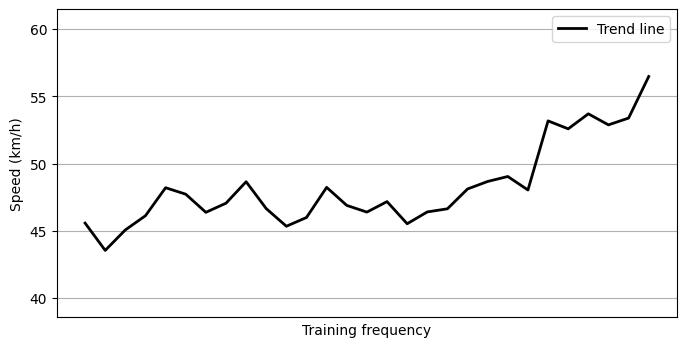

In [ ]:
def fleet_avg_speed(df: pd.DataFrame):
    fleet_avg = (df['Avg_0_speed'] + df['Avg_1_speed'] + df['Avg_2_speed']) / 3 * 3.6
    window = WINDOW
    data = fleet_avg.groupby(fleet_avg.index // window).mean()
    plt.figure(figsize=(8,4))
    plt.plot(
        data.index * window, 
        data,
        color='black', 
        linewidth=2,
        label="Trend line"
    )
    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training frequency")
    plt.xticks([])
    plt.ylabel("Speed (km/h)")
    plt.ylim((data.min()-5, data.max()+5))
    plt.show()

fleet_avg_speed(exp0)

## Fig. 3

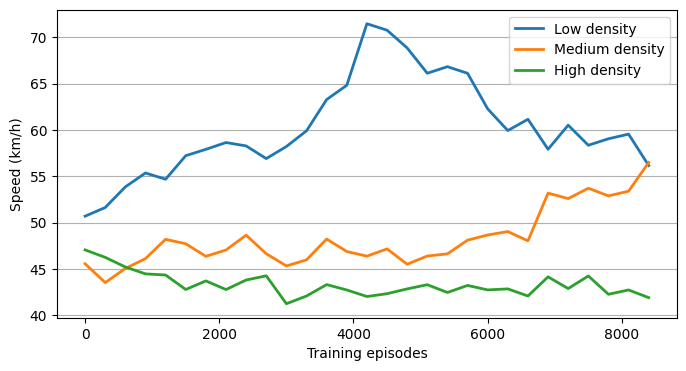

In [44]:
def speed_per_density(df_low: pd.DataFrame, df_medium: pd.DataFrame, df_high: pd.DataFrame):
    speed_low = (df_low['Avg_0_speed'] + df_low['Avg_1_speed'] + df_low['Avg_2_speed']) / 3 * 3.6
    speed_medium = (df_medium['Avg_0_speed'] + df_medium['Avg_1_speed'] + df_medium['Avg_2_speed']) / 3 * 3.6
    speed_high = (df_high['Avg_0_speed'] + df_high['Avg_1_speed'] + df_high['Avg_2_speed']) / 3 * 3.6

    window = WINDOW
    data_low = speed_low.groupby(speed_low.index // window).mean()
    data_medium = speed_medium.groupby(speed_medium.index // window).mean()
    data_high = speed_high.groupby(speed_high.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_low.index * window, data_low, linewidth=2, label="Low density")
    plt.plot(data_medium.index * window, data_medium, linewidth=2, label="Medium density")
    plt.plot(data_high.index * window, data_high, linewidth=2, label="High density")

    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Speed (km/h)")
    plt.show()

speed_per_density(exp2, exp0, exp3)

## Fig. 4, 5, 6

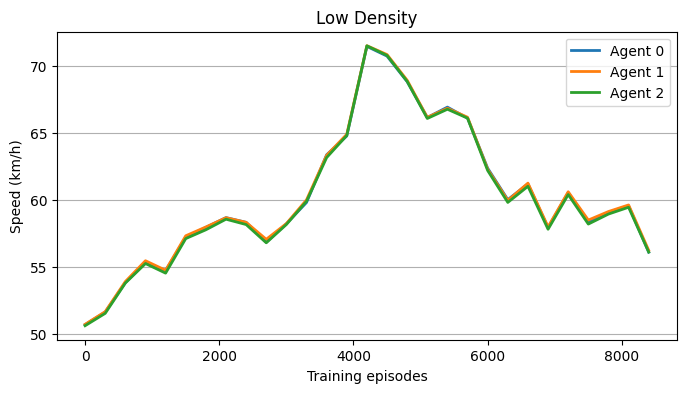

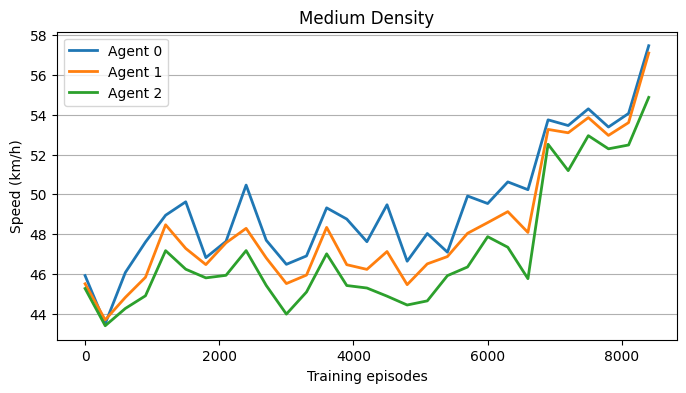

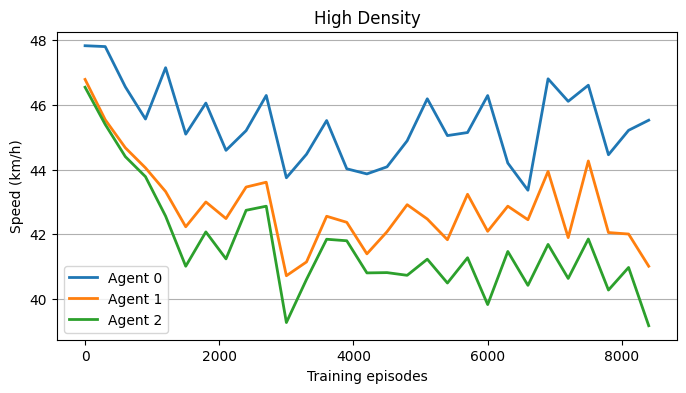

In [45]:
def agents_speed_specific_density(df: pd.DataFrame, density: str):
    window = WINDOW
    data_a0 = df['Avg_0_speed'].groupby(df['Avg_0_speed'].index // window).mean() * 3.6
    data_a1 = df['Avg_1_speed'].groupby(df['Avg_1_speed'].index // window).mean() * 3.6
    data_a2 = df['Avg_2_speed'].groupby(df['Avg_2_speed'].index // window).mean() * 3.6

    plt.figure(figsize=(8,4))
    plt.plot(data_a0.index * window, data_a0, linewidth=2, label="Agent 0")
    plt.plot(data_a1.index * window, data_a1, linewidth=2, label="Agent 1")
    plt.plot(data_a2.index * window, data_a2, linewidth=2, label="Agent 2")

    plt.grid(axis='y')
    plt.title(f"{density} Density")
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Speed (km/h)")
    plt.show()

agents_speed_specific_density(exp2, density="Low")
agents_speed_specific_density(exp0, density="Medium")
agents_speed_specific_density(exp3, density="High")

## Fig. 7

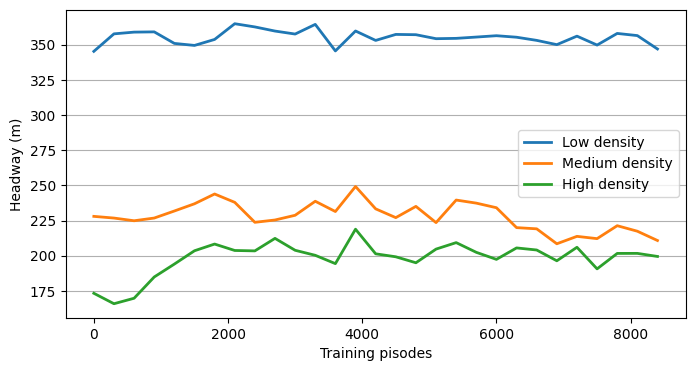

In [46]:
def headway_per_density(df_low: pd.DataFrame, df_medium: pd.DataFrame, df_high: pd.DataFrame):
    headway_low = (df_low['Avg_0_headway'] + df_low['Avg_1_headway'] + df_low['Avg_2_headway']) / 3
    headway_medium = (df_medium['Avg_0_headway'] + df_medium['Avg_1_headway'] + df_medium['Avg_2_headway']) / 3
    headway_high = (df_high['Avg_0_headway'] + df_high['Avg_1_headway'] + df_high['Avg_2_headway']) / 3

    window = WINDOW
    data_low = headway_low.groupby(headway_low.index // window).mean()
    data_medium = headway_medium.groupby(headway_medium.index // window).mean()
    data_high = headway_high.groupby(headway_high.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_low.index * window, data_low, linewidth=2, label="Low density")
    plt.plot(data_medium.index * window, data_medium, linewidth=2, label="Medium density")
    plt.plot(data_high.index * window, data_high, linewidth=2, label="High density")

    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training pisodes")
    plt.ylabel("Headway (m)")
    plt.show()

headway_per_density(exp2, exp0, exp3)

## Fig. 8, 9, 10

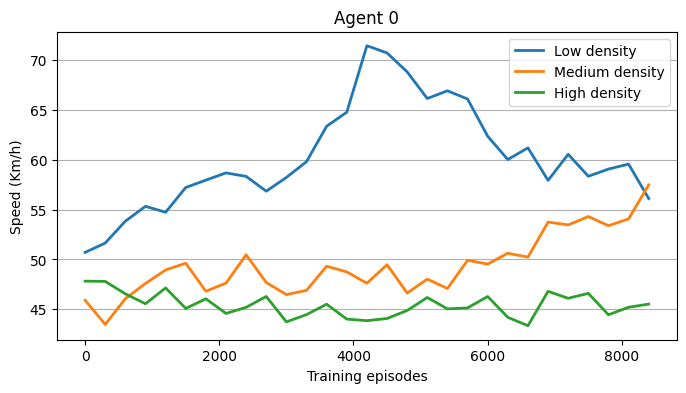

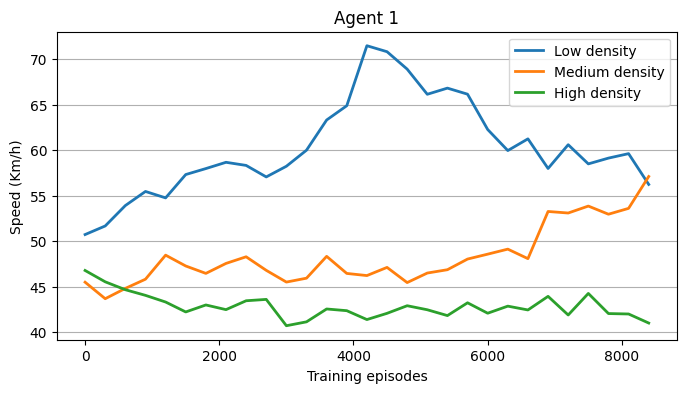

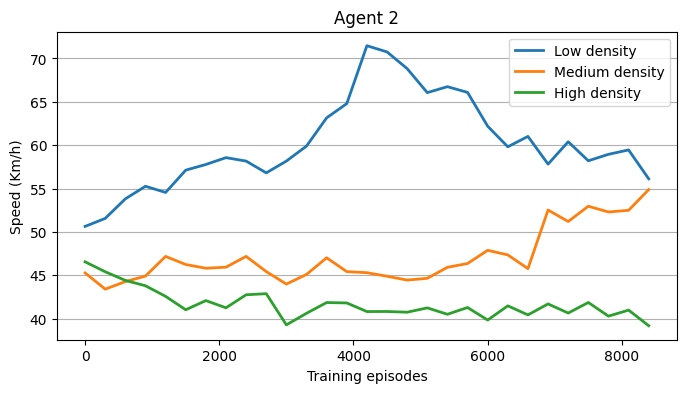

In [47]:
def agent_speed_per_density(agent: int, df_low: pd.DataFrame, df_medium: pd.DataFrame, df_high: pd.DataFrame):
    speed_low = df_low[f'Avg_{agent}_speed'] * 3.6
    speed_medium = df_medium[f'Avg_{agent}_speed'] * 3.6
    speed_high = df_high[f'Avg_{agent}_speed'] * 3.6

    window = WINDOW
    data_low = speed_low.groupby(speed_low.index // window).mean()
    data_medium = speed_medium.groupby(speed_medium.index // window).mean()
    data_high = speed_high.groupby(speed_high.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_low.index * window, data_low, linewidth=2, label="Low density")
    plt.plot(data_medium.index * window, data_medium, linewidth=2, label="Medium density")
    plt.plot(data_high.index * window, data_high, linewidth=2, label="High density")

    plt.grid(axis='y')
    plt.title(f"Agent {agent}")
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Speed (Km/h)")
    plt.show()

agent_speed_per_density(0, exp2, exp0, exp3)
agent_speed_per_density(1, exp2, exp0, exp3)
agent_speed_per_density(2, exp2, exp0, exp3)

## Fig. 11, 12

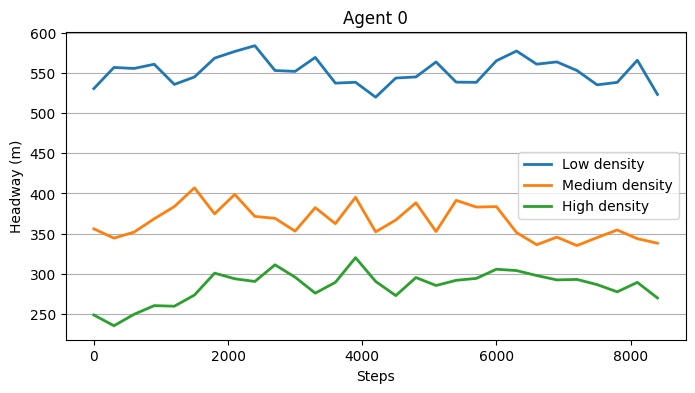

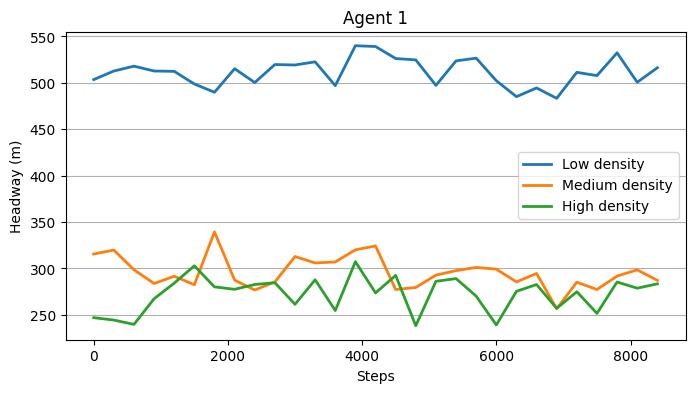

In [48]:
def agent_headway_per_density(agent: int, df_low: pd.DataFrame, df_medium: pd.DataFrame, df_high: pd.DataFrame):
    headway_low = df_low[f'Avg_{agent}_headway']
    headway_medium = df_medium[f'Avg_{agent}_headway']
    headway_high = df_high[f'Avg_{agent}_headway']

    window = WINDOW
    data_low = headway_low.groupby(headway_low.index // window).mean()
    data_medium = headway_medium.groupby(headway_medium.index // window).mean()
    data_high = headway_high.groupby(headway_high.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_low.index * window, data_low, linewidth=2, label="Low density")
    plt.plot(data_medium.index * window, data_medium, linewidth=2, label="Medium density")
    plt.plot(data_high.index * window, data_high, linewidth=2, label="High density")

    plt.grid(axis='y')
    plt.title(f"Agent {agent}")
    plt.legend()
    plt.xlabel("Steps")
    plt.ylabel("Headway (m)")
    plt.show()

agent_headway_per_density(0, exp2, exp0, exp3)
agent_headway_per_density(1, exp2, exp0, exp3)

## Fig. 13

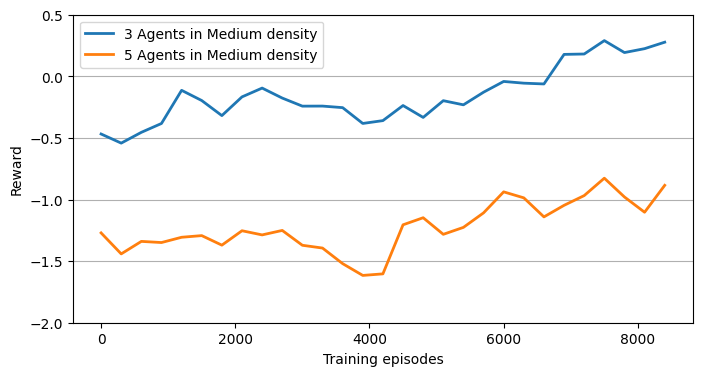

In [49]:
def reward_per_n_agents(df_3agents: pd.DataFrame, df_5agents: pd.DataFrame):
    reward_3agents = df_3agents['reward']
    reward_5agents = df_5agents['reward']

    window = WINDOW
    data_3agents = reward_3agents.groupby(reward_3agents.index // window).mean()
    data_5agents = reward_5agents.groupby(reward_5agents.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_3agents.index * window, data_3agents, linewidth=2, label="3 Agents in Medium density")
    plt.plot(data_5agents.index * window, data_5agents, linewidth=2, label="5 Agents in Medium density")

    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Reward")
    plt.ylim((-2, 0.5))
    plt.show()

reward_per_n_agents(exp0, exp1)

## Fig. 14

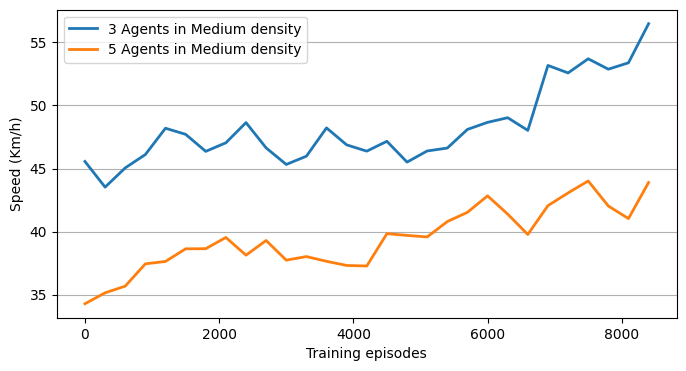

In [50]:
def speed_per_n_agents(df_3agents: pd.DataFrame, df_5agents: pd.DataFrame):
    fleet_speed_3agents = (df_3agents['Avg_0_speed'] + df_3agents['Avg_1_speed'] + df_3agents['Avg_2_speed']) / 3 * 3.6
    fleet_speed_5agents = (df_5agents['Avg_0_speed'] + df_5agents['Avg_1_speed'] + df_5agents['Avg_2_speed'] + df_5agents['Avg_3_speed'] + df_5agents['Avg_4_speed']) / 5 * 3.6

    window = WINDOW
    data_3agents = fleet_speed_3agents.groupby(fleet_speed_3agents.index // window).mean()
    data_5agents = fleet_speed_5agents.groupby(fleet_speed_5agents.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_3agents.index * window, data_3agents, linewidth=2, label="3 Agents in Medium density")
    plt.plot(data_5agents.index * window, data_5agents, linewidth=2, label="5 Agents in Medium density")

    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Speed (Km/h)")
    plt.show()

speed_per_n_agents(exp0, exp1)

## Fig. 15

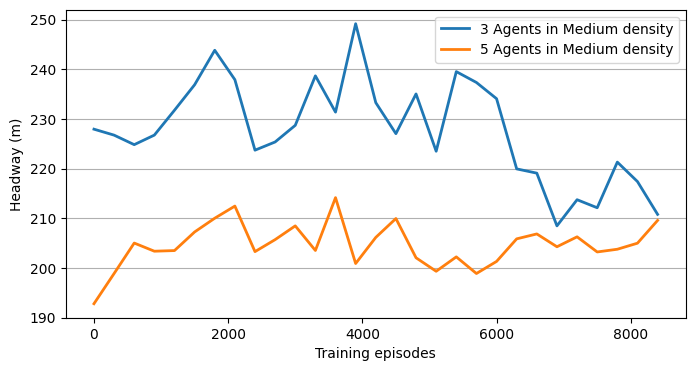

In [51]:
def headway_per_n_agents(df_3agents: pd.DataFrame, df_5agents: pd.DataFrame):
    headway_3agents = (df_3agents['Avg_0_headway'] + df_3agents['Avg_1_headway'] + df_3agents['Avg_2_headway']) / 3
    headway_5agents = (df_5agents['Avg_0_headway'] + df_5agents['Avg_1_headway'] + df_5agents['Avg_2_headway'] + df_5agents['Avg_3_headway'] + df_5agents['Avg_4_headway']) / 5

    window = WINDOW
    data_3agents = headway_3agents.groupby(headway_3agents.index // window).mean()
    data_5agents = headway_5agents.groupby(headway_5agents.index // window).mean()

    plt.figure(figsize=(8,4))
    plt.plot(data_3agents.index * window, data_3agents, linewidth=2, label="3 Agents in Medium density")
    plt.plot(data_5agents.index * window, data_5agents, linewidth=2, label="5 Agents in Medium density")

    plt.grid(axis='y')
    plt.legend()
    plt.xlabel("Training episodes")
    plt.ylabel("Headway (m)")
    plt.show()

headway_per_n_agents(exp0, exp1)

## Own experiments

In [52]:
def compare_3agents_exps(df1: pd.DataFrame, df2: pd.DataFrame, label1, label2):
    speed1 = (df1['Avg_0_speed'] + df1['Avg_1_speed'] + df1['Avg_2_speed']) / 3 * 3.6
    speed2 = (df2['Avg_0_speed'] + df2['Avg_1_speed'] + df2['Avg_2_speed']) / 3 * 3.6

    headway1 = (df1['Avg_0_headway'] + df1['Avg_1_headway'] + df1['Avg_2_headway']) / 3
    headway2 = (df2['Avg_0_headway'] + df2['Avg_1_headway'] + df2['Avg_2_headway']) / 3

    reward1 = df1['reward']
    reward2 = df2['reward']

    ep_len1 = df1['ep_len']
    ep_len2 = df2['ep_len']

    lane_changes1 = df1['Total_Lane_Changes']
    lane_changes2 = df2['Total_Lane_Changes']

    crahses1 = df1['Total_Crashed_Cras']
    crashes2 = df2['Total_Crashed_Cras']

    metrics = {
        "Speed (km/h)": (speed1, speed2),
        "Headway (m)": (headway1, headway2),
        "Reward": (reward1, reward2),
        "Episode length": (ep_len1, ep_len2),
        "Lane Changes": (lane_changes1, lane_changes2),
        "Agent Crashes": (crahses1, crashes2)
    }

    for metric_name, (metric1, metric2) in metrics.items():
        window = WINDOW
        data1 = metric1.groupby(metric1.index // window).mean()
        data2 = metric2.groupby(metric2.index // window).mean()

        plt.figure(figsize=(8,4))
        plt.plot(data1.index * window, data1, linewidth=2, label=label1)
        plt.plot(data2.index * window, data2, linewidth=2, label=label2)

        plt.grid(axis='y')
        plt.legend()
        plt.xlabel("Training episodes")
        plt.ylabel(metric_name)
        if "Episode" in metric_name:
            plt.ylim(top=61)
        elif "Crashes" in metric_name:
            plt.ylim((-0.2, 3.2))
        plt.show()

### DQN Greedy vs No Greedy

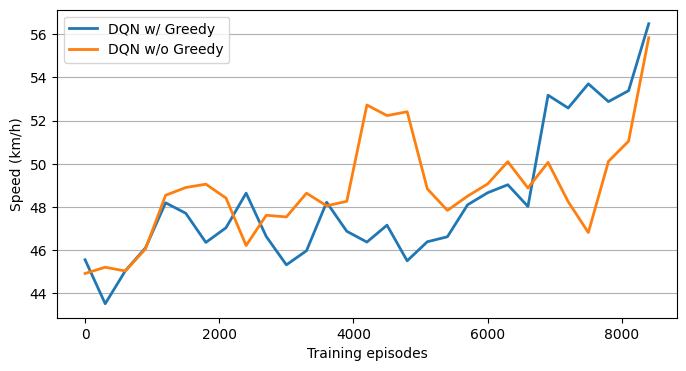

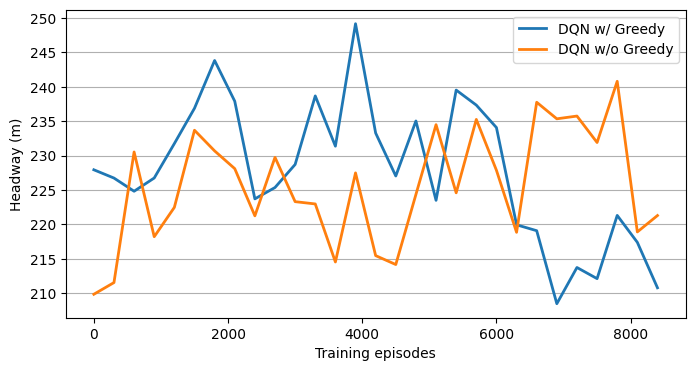

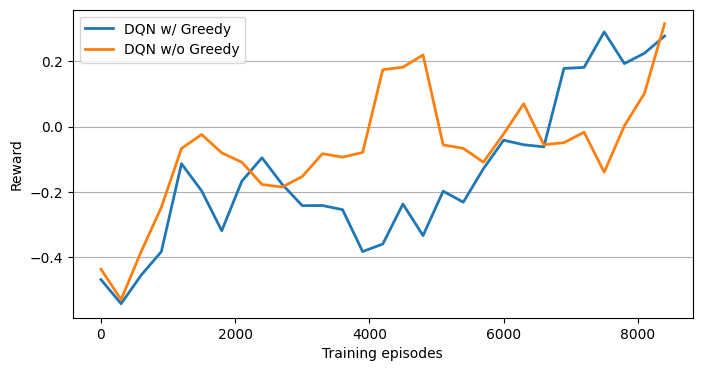

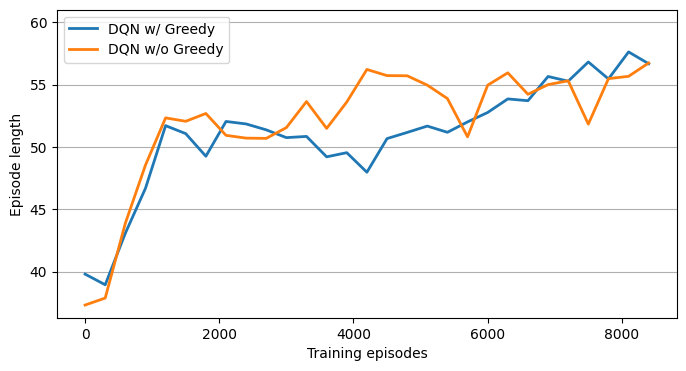

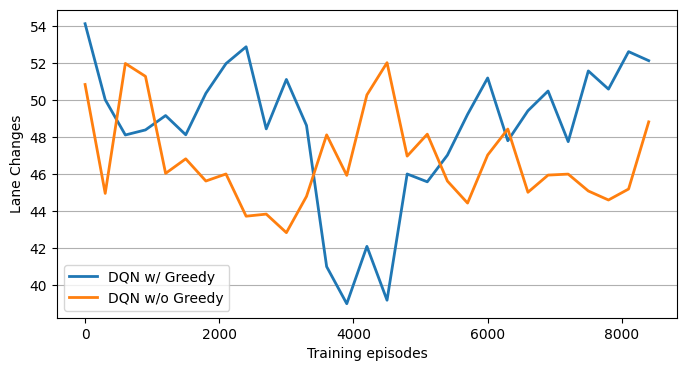

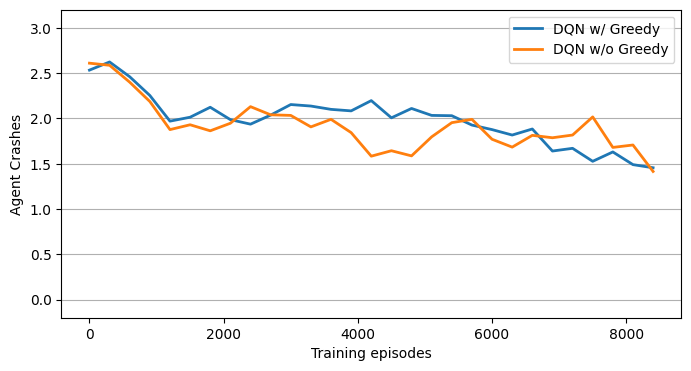

In [53]:
compare_3agents_exps(exp0, exp4, label1="DQN w/ Greedy", label2="DQN w/o Greedy")

### DQN vs PPO

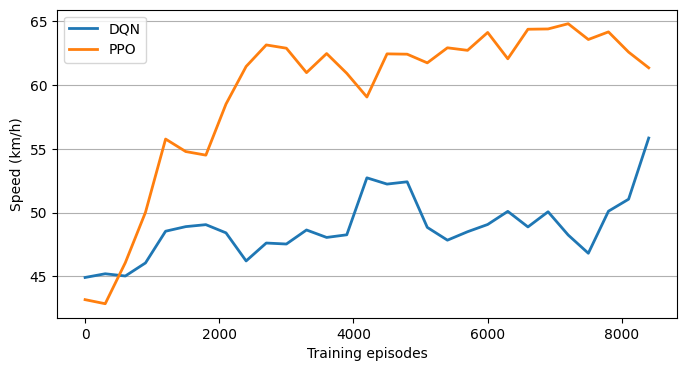

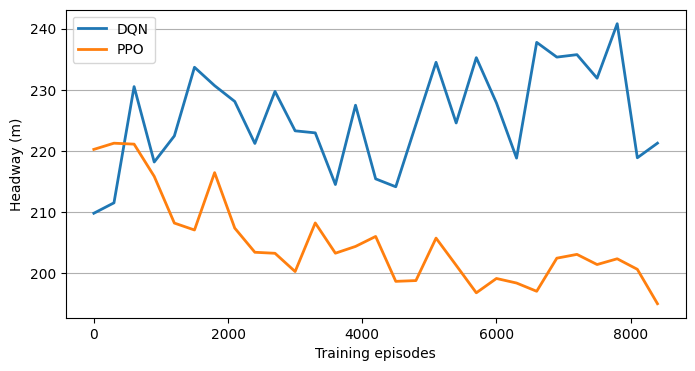

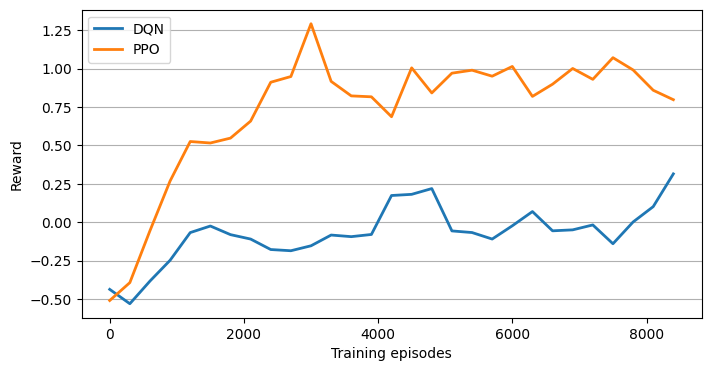

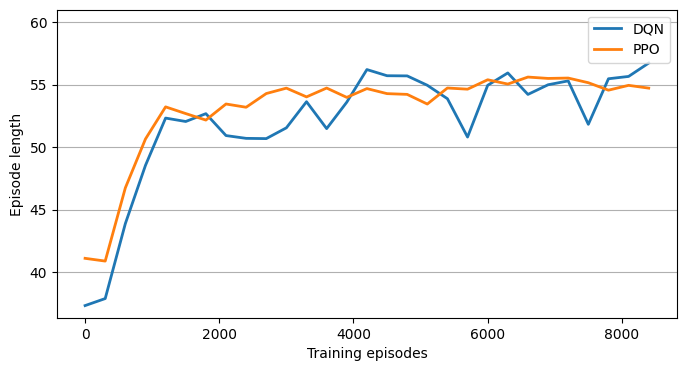

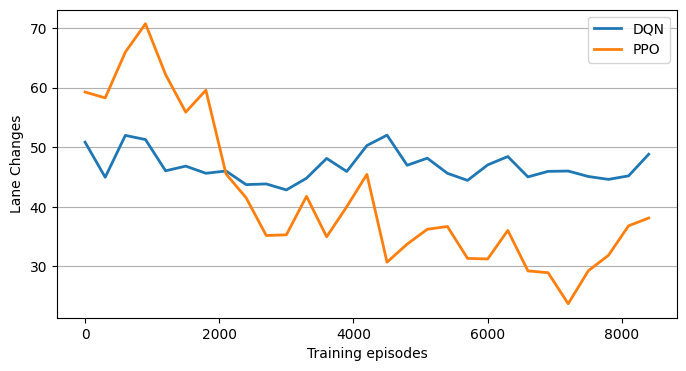

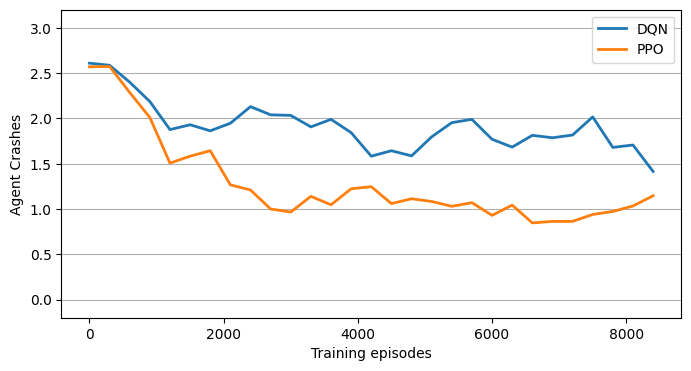

In [54]:
compare_3agents_exps(exp4, exp6, label1="DQN", label2="PPO")

### Kinematics vs Image obs - DQN

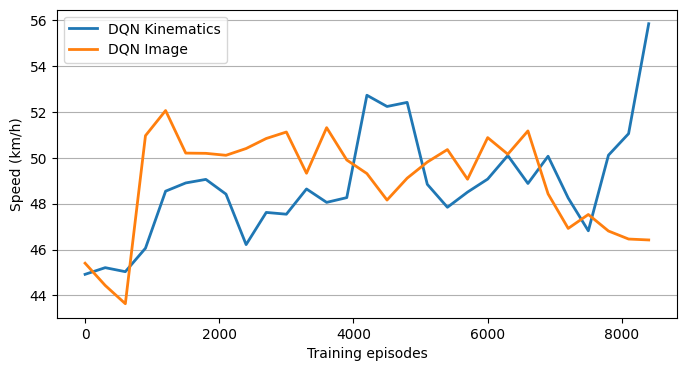

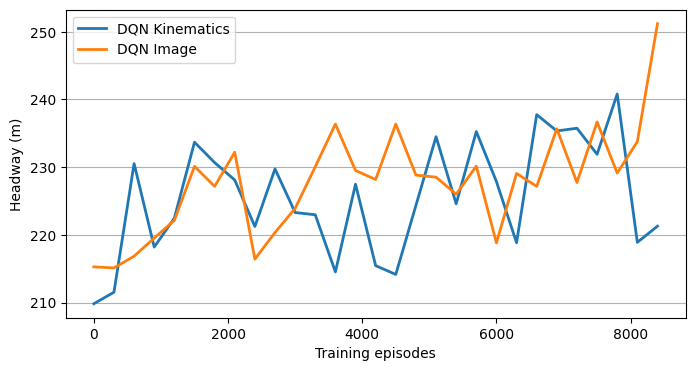

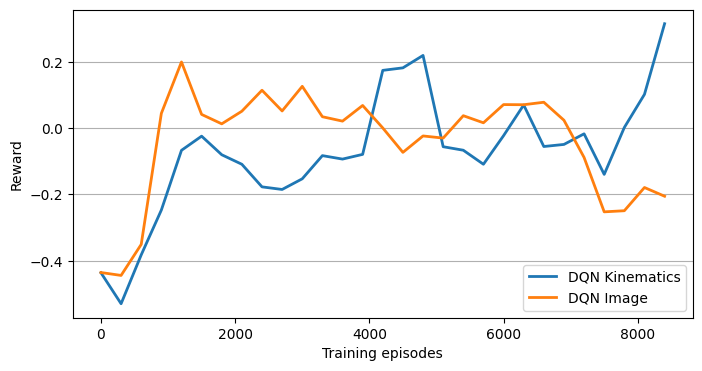

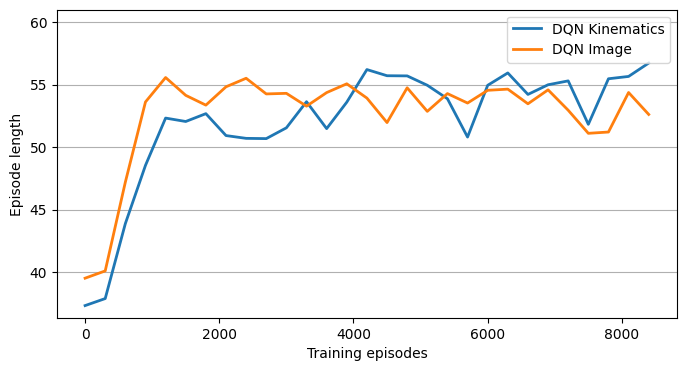

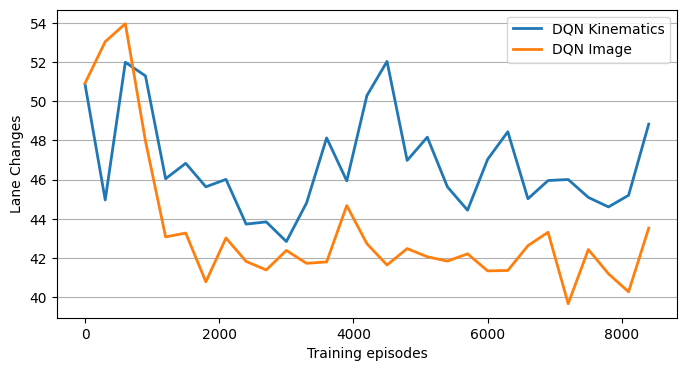

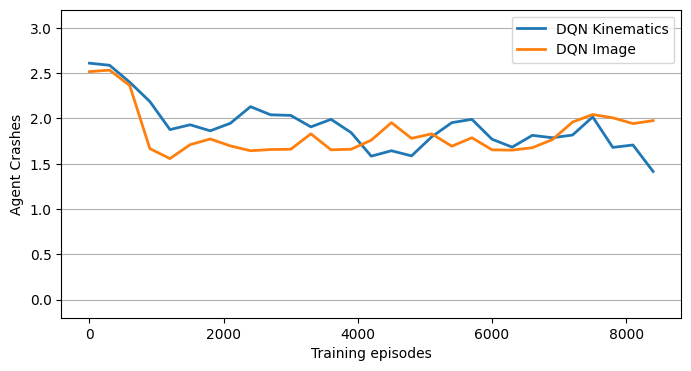

In [55]:
compare_3agents_exps(exp4, exp5, label1="DQN Kinematics", label2="DQN Image")

### Kinematics vs Image obs - PPO

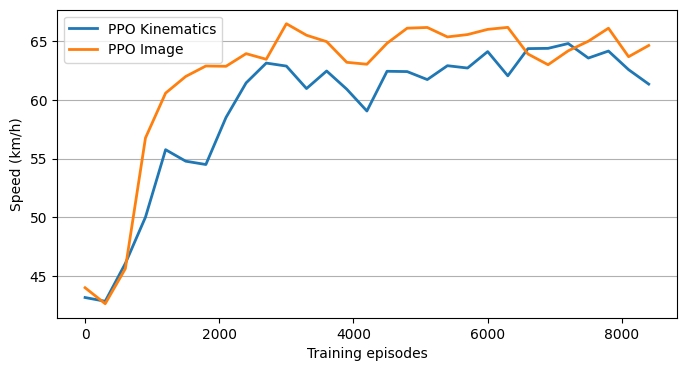

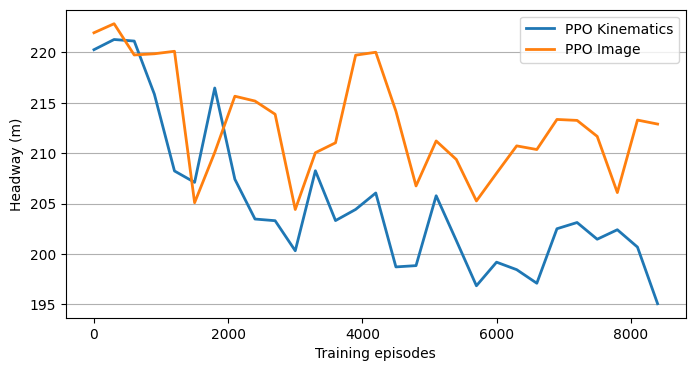

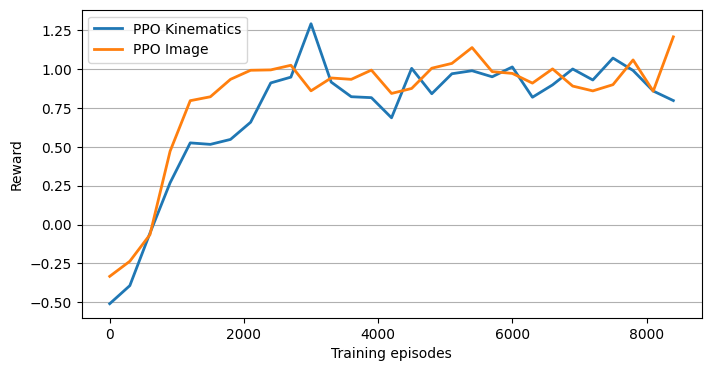

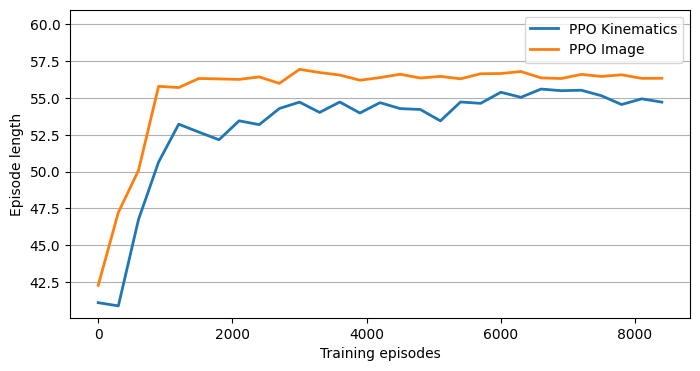

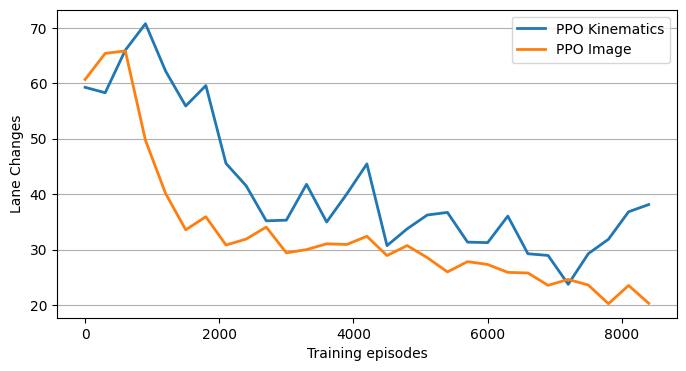

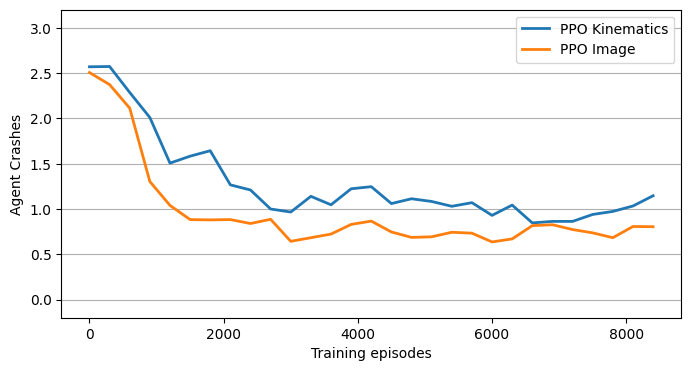

In [56]:
compare_3agents_exps(exp6, exp7, label1="PPO Kinematics", label2="PPO Image")

## DQN 5 agents vs PPO 5 agents

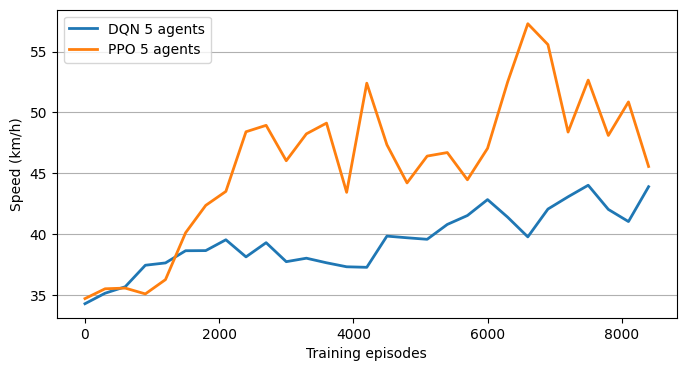

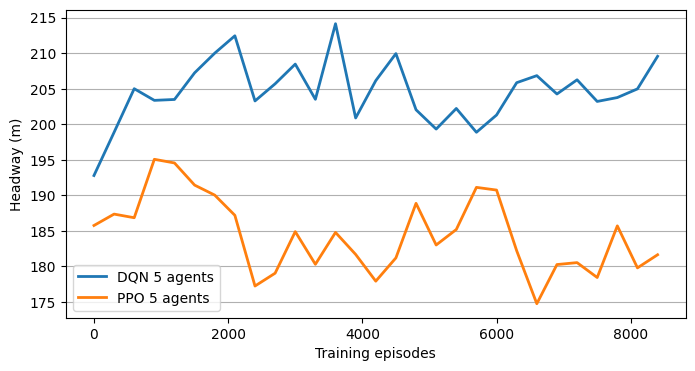

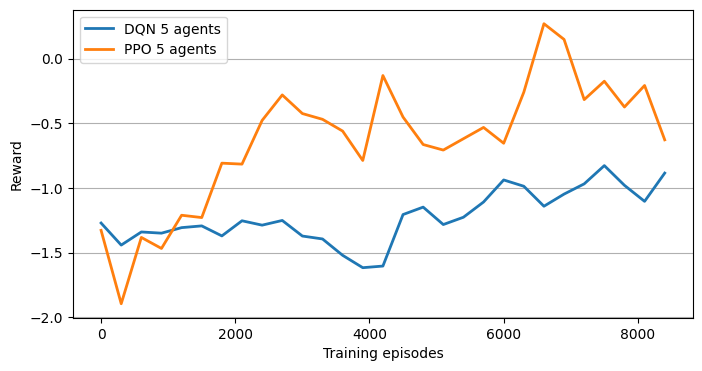

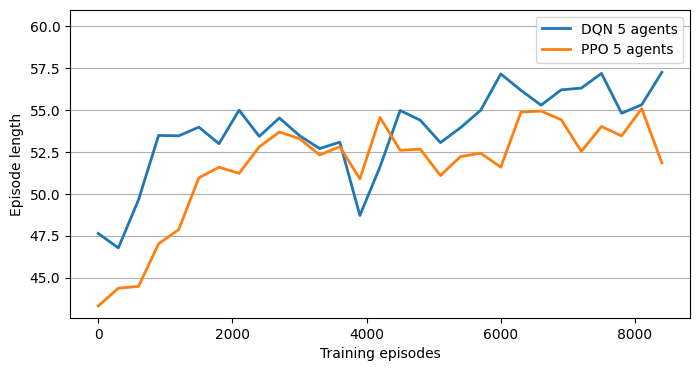

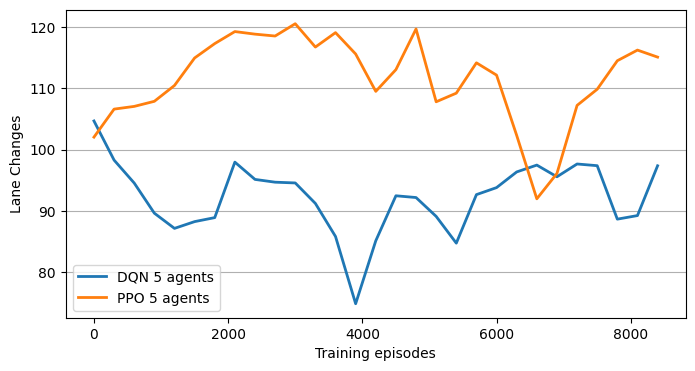

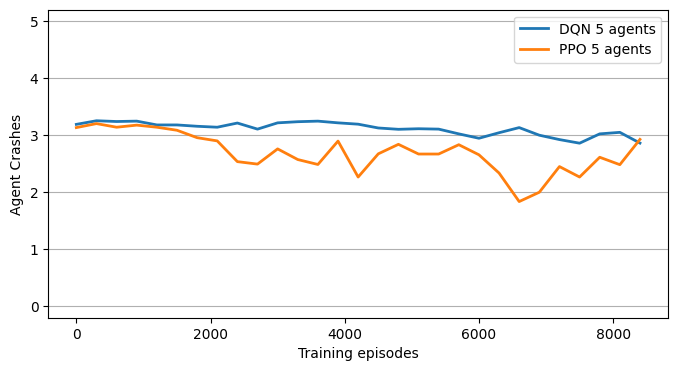

In [58]:
def dqn_ppo_5agents(df1: pd.DataFrame, df2: pd.DataFrame, label1, label2):
    speed1 = (df1['Avg_0_speed'] + df1['Avg_1_speed'] + df1['Avg_2_speed'] + df1['Avg_3_speed'] + df1['Avg_4_speed']) / 5 * 3.6
    speed2 = (df2['Avg_0_speed'] + df2['Avg_1_speed'] + df2['Avg_2_speed'] + df2['Avg_3_speed'] + df2['Avg_4_speed']) / 5 * 3.6

    headway1 = (df1['Avg_0_headway'] + df1['Avg_1_headway'] + df1['Avg_2_headway'] + df1['Avg_3_headway'] + df1['Avg_4_headway']) / 5
    headway2 = (df2['Avg_0_headway'] + df2['Avg_1_headway'] + df2['Avg_2_headway'] + df2['Avg_3_headway'] + df2['Avg_4_headway']) / 5

    reward1 = df1['reward']
    reward2 = df2['reward']

    ep_len1 = df1['ep_len']
    ep_len2 = df2['ep_len']

    lane_changes1 = df1['Total_Lane_Changes']
    lane_changes2 = df2['Total_Lane_Changes']

    crahses1 = df1['Total_Crashed_Cras']
    crashes2 = df2['Total_Crashed_Cras']

    metrics = {
        "Speed (km/h)": (speed1, speed2),
        "Headway (m)": (headway1, headway2),
        "Reward": (reward1, reward2),
        "Episode length": (ep_len1, ep_len2),
        "Lane Changes": (lane_changes1, lane_changes2),
        "Agent Crashes": (crahses1, crashes2)
    }

    for metric_name, (greedy, no1) in metrics.items():
        window = WINDOW
        data_greeedy = greedy.groupby(greedy.index // window).mean()
        data2 = no1.groupby(no1.index // window).mean()

        plt.figure(figsize=(8,4))
        plt.plot(data_greeedy.index * window, data_greeedy, linewidth=2, label=label1)
        plt.plot(data2.index * window, data2, linewidth=2, label=label2)

        plt.grid(axis='y')
        plt.legend()
        plt.xlabel("Training episodes")
        plt.ylabel(metric_name)
        if "Episode" in metric_name:
            plt.ylim(top=61)
        elif "Crashes" in metric_name:
            plt.ylim((-0.2, 5.2))
        plt.show()

dqn_ppo_5agents(exp1, exp8, label1="DQN 5 agents", label2="PPO 5 agents")